In [386]:
import scipy.signal as signal
import scipy.special as sciS
#import scipyx as spx
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

w = sp.symbols('w ', real=True)
s = sp.symbols('s')



#s=sp.I*w

In [387]:
#CAUER PASA ALTOS
#Fp = 15kHz; Fa = 3.75kHz; Ap = 2dB; Aa = 40dB; |Zin| >= 50kohm
fp, fa, Aa, Ap = sp.symbols('fp, fa, Aa, Ap', real=True)
#K=1/wa , wa frec de atenuación ; K1 = Ep/Ea, ganancia de paso/ ganancia de atenuacion
#F = Sn(E * SN^-1(w,k) , k1)
#H(w^2) = 1/(1+ xi^2 * F^2)
#N, rp, rs, Wn, btype='low', analog=False, output='ba', fs=None
fp = 12606
fa = 4460
Aa = 0.1
Ap = 52
gain = 0.9
wa = fa * 2 * sp.pi
Orden = 4   #Orden del filtro   

orden_min, w_c = signal.ellipord(1, (fp/fa), Aa, Ap, analog=True)
#https://github.com/scipy/scipy/blob/v1.11.3/scipy/signal/_filter_design.py#L3335-L3457#Orden, wc = signal.ellipord(1, (), self.ap_dB, Aa, analog=True)

N, D = signal.ellip(Orden, Aa, Ap, (fp), btype='highpass', analog=True, output='ba')
z, p, k = signal.ellip(Orden, Aa, Ap, (fp), btype='highpass', analog=True, output='zpk')

H_high_pass = signal.TransferFunction((N*gain), D) 
print(H_high_pass)

TransferFunctionContinuous(
array([8.89697785e-01, 0.00000000e+00, 2.09024394e+07, 0.00000000e+00,
       6.37877651e+13]),
array([1.00000000e+00, 2.87814129e+04, 4.64457153e+08, 3.99885678e+12,
       2.82159630e+16]),
dt: None
)


In [388]:
SecondOrderFun = signal.zpk2sos(z, p, (k*gain))
SecondOrderFun #[funcion][param 0-2 num]33-5 den


fun1 = SecondOrderFun[0]
num1 = fun1[0]*s**2 + fun1[1]*s + fun1[2]
den1 = fun1[3]*s**2 + fun1[4]*s + fun1[5]
#Transf1 = signal.TransferFunction(num1, den1)
Transf1 = (num1/den1)
#display(Transf1)

fun2 = SecondOrderFun[1]
num2 = fun2[0]*s**2 + fun2[1]*s + fun2[2]
den2 = fun2[3]*s**2 + fun2[4]*s + fun2[5]
#Transf2 = signal.TransferFunction(num2, den2)
Transf2 = (num2/den2)
#display(Transf2)

numT = sp.simplify(num1*num2)
denT = sp.expand(den1*den2)
Transft = (numT/denT)
display(Transft)

cerosT = sp.roots(numT)
polosT = sp.roots(denT)
#display(polosT)


(0.889697785191245*s**4 + 20902439.4331991*s**2 + 63787765111735.1)/(1.0*s**4 + 28781.4128869924*s**3 + 464457152.821888*s**2 + 3998856783630.54*s + 2.82159629828488e+16)

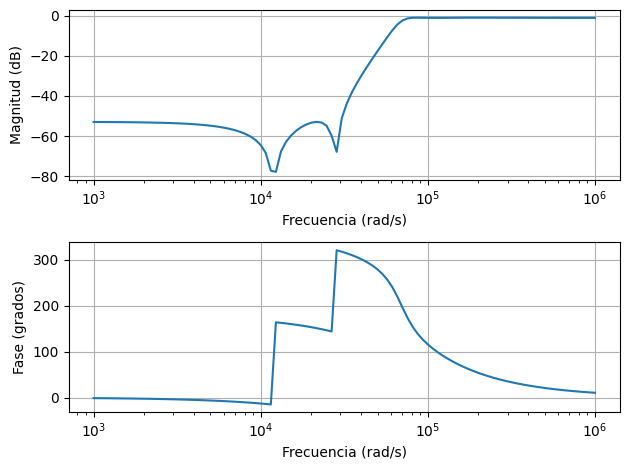

In [389]:
from scipy.signal import lti, bode

# Definir la función de transferencia en el dominio de Laplace
numerator = [0.889697785191245,0,825195232.893623,0,9.94161314979931e+16]
denominator = [1, 180838.95057142,18336033438.4333,991917278705139.0,4.39758609089338e+19]
system = lti(numerator, denominator)

# Calcular el diagrama de Bode
w, mag, phase = bode(system)

# Graficar el diagrama de Bode en dB
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)  # Diagrama de magnitud en dB
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # Diagrama de fase
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.grid(True)

plt.tight_layout()
plt.show(block=True)

In [390]:
wz_1 = np.sqrt(fun1[2])
wz_2 = np.sqrt(fun2[2])

wo_1 = np.sqrt(fun1[5])  #15253.029668551739
wo_2 = np.sqrt(fun2[5])  #11012.636981186159

Q_1 = wo_1/fun1[4] #0.6298317215606853
Q_2 = wo_2/fun2[4] #2.413048533000139


#DECIDO Qo
Qo_1 = 0.8*(Q_1**0.605) #0.6048125965650132
Qo_2 = 0.8*(Q_2**0.605) #1.3631462444095646


Qo_2

1.3631462444095646

In [391]:
#PARAMETROS DE LA CELDA
K_1 = 1 +((1-(Qo_1/Q_1))/(2*(Qo_1**2)))
K_2 = 1 +((1-(Qo_2/Q_2))/(2*(Qo_2**2)))

k_1 = (fun1[0])*((fun1[2]/fun1[0])/fun1[5])/(1-(Qo_1/Q_1)) #0.309
k_2 = (fun2[0])*((fun2[2]/fun2[0])/fun2[5])/(1-(Qo_2/Q_2)) #0.377

n_1 = k_1*(1-(Qo_1/(K_1*Q_1))) #0.02753
n_2 = k_2*(1-(Qo_2/(K_2*Q_2))) #0.18631

m_1 = k_1*((K_1-1)/K_1)*(1+(2*(Qo_1**2)*(fun1[5]/(fun1[2]/fun1[0])))) #0.85977
m_2 = k_2*((K_2-1)/K_2)*(1+(2*(Qo_2**2)*(fun2[5]/(fun2[2]/fun2[0])))) #0.93469



In [392]:
Ga_1,Gb_1,G1_1,G4_1,C2_1,C3_1 = sp.symbols('Ga_1,Gb_1,G1_1,G4_1,C2_1,C3_1', real=True)
Ga_2,Gb_2,G1_2,G4_2,C2_2,C3_2 = sp.symbols('Ga_2,Gb_2,G1_2,G4_2,C2_2,C3_2', real=True)
G_1, C_1 = sp.symbols('G_1, C_1', real=True)
G_2, C_2 = sp.symbols('G_2, C_2', real=True)

G_1 = 1/10000
G_2 = 1/10000

#definiciones
#G1_1 = 4*(Qo_1**2)*G_1
C_1 = 2*G_1*(Qo_1/wo_1)
C2_1 =C_1
C3_1 =C_1
G4_1 = G_1

#G1_2 = 4*(Qo_2**2)*G_2
C_2 = 2*G_2*(Qo_2/wo_2)
C2_2 =C_2
C3_2 =C_2
G4_2 = G_2


#OpAmp -> TL082
Ao = 10**5
GBwp = 4*(10**6)

#distorsion de valores por ancho de banda finito (OA)
wp_1 = wo_1*(1+(Qo_1*(wo_1/GBwp)))
Qp_1 = Q_1*(1-(2*Q_1*Qo_1*(wo_1/GBwp)*((1/(2*Q_1))-(wo_1/GBwp)))) 

wp_2 = wo_2*(1+(Qo_2*(wo_2/GBwp)))
Qp_2 = Q_2*(1-(2*Q_2*Qo_2*(wo_2/GBwp)*((1/(2*Q_2))-(wo_2/GBwp))))

#calcular G1 y G4
G1_1 = 2*Qo_1*wp_1*C2_1
G1_2 = 2*Qo_2*wp_2*C2_2


#componentes
Ga1_1 = (1-k_1)* Ga_1
Ga2_1 = k_1*Ga_1
G41_1 = (1-n_1)* G4_1
G42_1 = n_1* G4_1
C21_1 = (1-m_1)* C2_1
C22_1 = m_1 * C2_1

Ga1_2 = (1-k_2)* Ga_2
Ga2_2 = k_2*Ga_2
G41_2 = (1-n_2)* G4_2
G42_2 = n_2* G4_2
C21_2 = (1-m_2)* C2_2
C22_2 = m_2 * C2_2






In [393]:
#formulas de Ga y Gb
#defino Rb 10k
Gb_1 = 1/10000
Gb_2 = 1/10000

Ga_1 = Gb_1*((G4_1/G1_1)*2 - ((wp_1*C2_1)/(Qp_1*G1_1)))
Ga_2 = Gb_2*((G4_2/G1_2)*2 - ((wp_2*C2_2)/(Qp_2*G1_2)))

#Ga_1 = (K_1 - 1)*Gb_1
#Ga_2 = (K_2 - 1)*Gb_2




In [394]:
#n1 = 0 -> despejo variables
Ga2_1 = sp.simplify(Gb_1 * ((G42_1*((Ga_1+Gb_1)/Gb_1)*((1/C2_1)+(1/C3_1)))
                /((G1_1/C2_1)+(G4_1*((1/C2_1)+(1/C3_1))))))

Ga2_2 = sp.simplify(Gb_2 * ((G42_2*((Ga_2+Gb_2)/Gb_2)*((1/C2_2)+(1/C3_2)))
                /((G1_2/C2_2)+(G4_2*((1/C2_2)+(1/C3_2))))))  

Ga1_1 = Ga_1 - Ga2_1
Ga1_2 = Ga_1 - Ga2_2


Ga2_2


4.39362844202991e-6

In [395]:
# Paso 7 : no/n2 , ecu 8/6

#Ecu8_1 = sp.simplify(((G1_1*G4_1)/(C_1**2))*(((G42_1/G4_1)*((Ga_1+Gb_1)/Gb_1)) - (Ga2_1/Gb_1)))
#Ecu6_1 = sp.simplify((((Ga_1+Gb_1)/Gb_1)*(C22_1/C2_1))-(Ga2_1/Gb_1))

#Ecu8_2 = sp.simplify(((G1_2*G4_2)/(C_2**2))*(((G42_2/G4_2)*((Ga_2+Gb_2)/Gb_2)) - (Ga2_2/Gb_2)))
#Ecu6_2 = sp.simplify((((Ga_2+Gb_2)/Gb_2)*(C22_2/C2_2))-(Ga2_2/Gb_2))

#cociente = sp.simplify(Ecu8_1/Ecu6_1)
#cociente = wz_1**2
#print(Ecu6_1)

In [396]:
Ra1_1 = 1/Ga1_1
Ra2_1 = 1/Ga2_1
Rb_1 = 1/Gb_1
R1_1 = 1/G1_1
R41_1 = 1/G41_1
R42_1 = 1/G42_1

Ra1_2 = 1/Ga1_2
Ra2_2 = 1/Ga2_2
Rb_2 = 1/Gb_2
R1_2 = 1/G1_2
R41_2 = 1/G41_2
R42_2 = 1/G42_2


print('Ra1_1:',Ra1_1)
print('Ra2_1:',Ra2_1)
print('Rb_1:',Rb_1)
print('R1_1:',R1_1)
print('R41_1:',R41_1)
print('R42_1:',R42_1)

print('\n')

print('Ra1_2:',Ra1_2)
print('Ra2_2:',Ra2_2)
print('Rb_2:',Rb_2)
print('R1_2:',R1_2)
print('R41_2:',R41_2)
print('R42_2:',R42_2)

print('\n')

print('C3_1:',C3_1)
print('C21_1:',C21_1)
print('C22_1:',C22_1)

print('\n')

print('C3_2:',C3_2)
print('C21_2:',C21_2)
print('C22_2:',C22_2)


Ra1_1: 339926.358201063
Ra2_1: 534356.223160973
Rb_1: 10000.0
R1_1: 6818.642018835513
R41_1: 10319.356189480888
R42_1: 323129.98868927395


Ra1_2: 2383244.87459721
Ra2_2: 227602.313940317
Rb_2: 10000.0
R1_2: 1340.3810136713835
R41_2: 12289.710446207126
R42_2: 53673.64448445812


C3_1: 7.930392973823405e-09
C21_1: 1.0963779183210795e-09
C22_1: 6.834015055502325e-09


C3_2: 2.4756037027976954e-08
C21_2: 1.6166284764518444e-09
C22_2: 2.313940855152511e-08


In [397]:
#CORROBORACION DE LOS n2, n1, n0
n0_1 = sp.simplify(((G1_1*G4_1)/(C_1**2))*(((G42_1/G4_1)*((Ga_1+Gb_1)/Gb_1)) - (Ga2_1/Gb_1)))
n2_1 = sp.simplify((((Ga_1+Gb_1)/Gb_1)*(C22_1/C2_1))-(Ga2_1/Gb_1))

n0_2 = sp.simplify(((G1_2*G4_2)/(C_2**2))*(((G42_2/G4_2)*((Ga_2+Gb_2)/Gb_2)) - (Ga2_2/Gb_2)))
n2_2 = sp.simplify((((Ga_2+Gb_2)/Gb_2)*(C22_2/C2_2))-(Ga2_2/Gb_2))

n1_1 = (G42_1*((Ga_1 + Gb_1)/Gb_1)*(2/C_1))-((Ga2_1/Gb_1)*((G1_1/C2_1)+G4_1*((1/C2_1)+(1/C3_1))))
n1_2 = (G42_2*((Ga_2 + Gb_1)/Gb_2)*(2/C_2))-((Ga2_2/Gb_2)*((G1_2/C2_2)+G4_2*((1/C2_2)+(1/C3_2))))

Hexp= (sp.expand((n2_1*s**2 +n0_1) * (n2_2*s**2 + n0_2)))/denT
display(Hexp)

print('n0_1:',n0_1)
print('n1_1:',n1_1)
print('n2_1:',n2_1)

print('\n')

print('n0_2:',n0_2)
print('n1_2:',n1_2)
print('n2_2:',n2_2)
print('\n')
print('woT:',(n0_2*n0_1))  #63787765111735.1 Original

(0.883384646973133*s**4 + 20843278.8931223*s**2 + 63845234175472.9)/(1.0*s**4 + 28781.4128869924*s**3 + 464457152.821888*s**2 + 3998856783630.54*s + 2.82159629828488e+16)

n0_1: 3200029.15481816
n1_1: 0
n2_1: 0.884513709681701


n0_2: 19951453.9045194
n1_2: 0
n2_2: 0.998723521528034


woT: 63845234175472.9
